# PRML Assignment - 8
# Principal Component Analysis

In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

## Load the Data matrix *faceimages.mat*
- ### There are 400 face images of size 112×92.
- ### Last column of the data is the class label.
- ### Column 1 to 10304 are 112×92 pixel. Each row represents one image.

In [0]:
arrays = {}
f = h5py.File("./faceimages.mat", "r")
for k, v in f.items():
    arrays[k] = np.array(v)

arrays

{'Database_name': array([[ 65],
        [ 84],
        [ 84],
        [ 32],
        [ 70],
        [ 97],
        [ 99],
        [101],
        [ 32],
        [ 68],
        [ 97],
        [116],
        [ 97],
        [ 98],
        [ 97],
        [115],
        [101]], dtype=uint16),
 'Record_Name': array([[115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115],
        [ 32,  32,  32,  32,  32,  32,  32,  32,  32,  49,  49,  49,  49,  49,  49,  49,  49,  49,  49,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  51,  51,  51,  51,  51,  51,  51,  51,  51,  51,  52],
        [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  48]], dtype=uint16),
 'data': array([[ 48.,  59.,  40., ..., 121., 118.,

**Visualize one of the faces from the data**

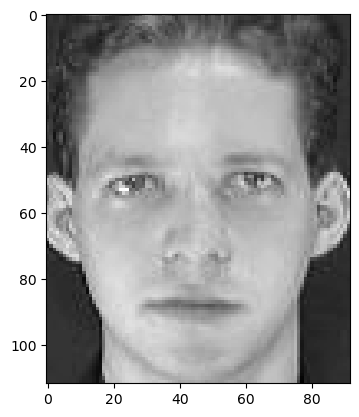

In [0]:
# Get faces data
faces_data = arrays["data"]
height, width = int(np.squeeze(arrays["height"])), int(np.squeeze(arrays["width"]))

# Plot one of the faces from the data
plt.imshow(faces_data[:-1, 0].reshape(width, height).T, cmap="gray")

In [0]:
X_face, Y_face = faces_data[:-1, :].T, faces_data[-1, :]
print(X_face.shape, Y_face.shape)

(400, 10304) (400,)


## Implementing PCA class inspired from `sklearn`

In [0]:
class CustomPCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
    
    def fit(self, X):
        """Fit the model with X and return self."""
        self._fit(X)
        return self
    
    def fit_transform(self, X):
        """Fit the model with X and apply the dimensionality reduction on X
        and return new reduced X.
        """
        U, S, Vt = self._fit(X)
        U = U[:, :self.n_components]

        # X_nproj = X * V = U * S * Vt * V = U * S
        X_nproj = U * S[:self.n_components]

        return X_nproj

    def _fit(self, X):
        n_samples, n_features = X.shape

        # Center data
        self.mean = X.mean(axis=0)
        X_centered = X - self.mean

        U, S, Vt = np.linalg.svd(X_centered)
        
        # Get variance explained by singular values
        explained_variance = (S ** 2) / (n_samples - 1)
        total_var = explained_variance.sum()
        explained_variance_ratio = explained_variance / total_var

        self.components = Vt[:self.n_components]
        self.all_components = Vt
        self.all_explained_variance = explained_variance
        self.all_explained_variance_ratio = explained_variance_ratio
        
        return U, S, Vt
    
    def inverse_transform(self, X):
        """Transform data back to its original space from the calculated components.
        In other words, return an input X_original whose transform would be X.
        """
        return np.dot(X, self.components) + self.mean

## Testing with 5, 10, 50, and 100 principal components
- ### Getting low dimensional representation of face images
  
- ### Reconstructing any face image with specified principal components
  
- ### Computing the reconstruction error for the same

- ### Plotting energy curve of PCA for the faces data

In [0]:
X_redu = []
X_reconst = []

for n in [5, 10, 50, 100]:
    custom_pca = CustomPCA(n_components=n)
    X_red = custom_pca.fit_transform(X_face)
    X_recons = custom_pca.inverse_transform(X_red)

    print(f"For {n} principal components:")
    print(f"Reduced representation - {X_red.shape}")
    print(f"Reconstructed - {X_recons.shape}\n")

    X_redu.append(X_red)
    X_reconst.append(X_recons)

For 5 principal components:
Reduced representation - (400, 5)
Reconstructed - (400, 10304)

For 10 principal components:
Reduced representation - (400, 10)
Reconstructed - (400, 10304)

For 50 principal components:
Reduced representation - (400, 50)
Reconstructed - (400, 10304)

For 100 principal components:
Reduced representation - (400, 100)
Reconstructed - (400, 10304)



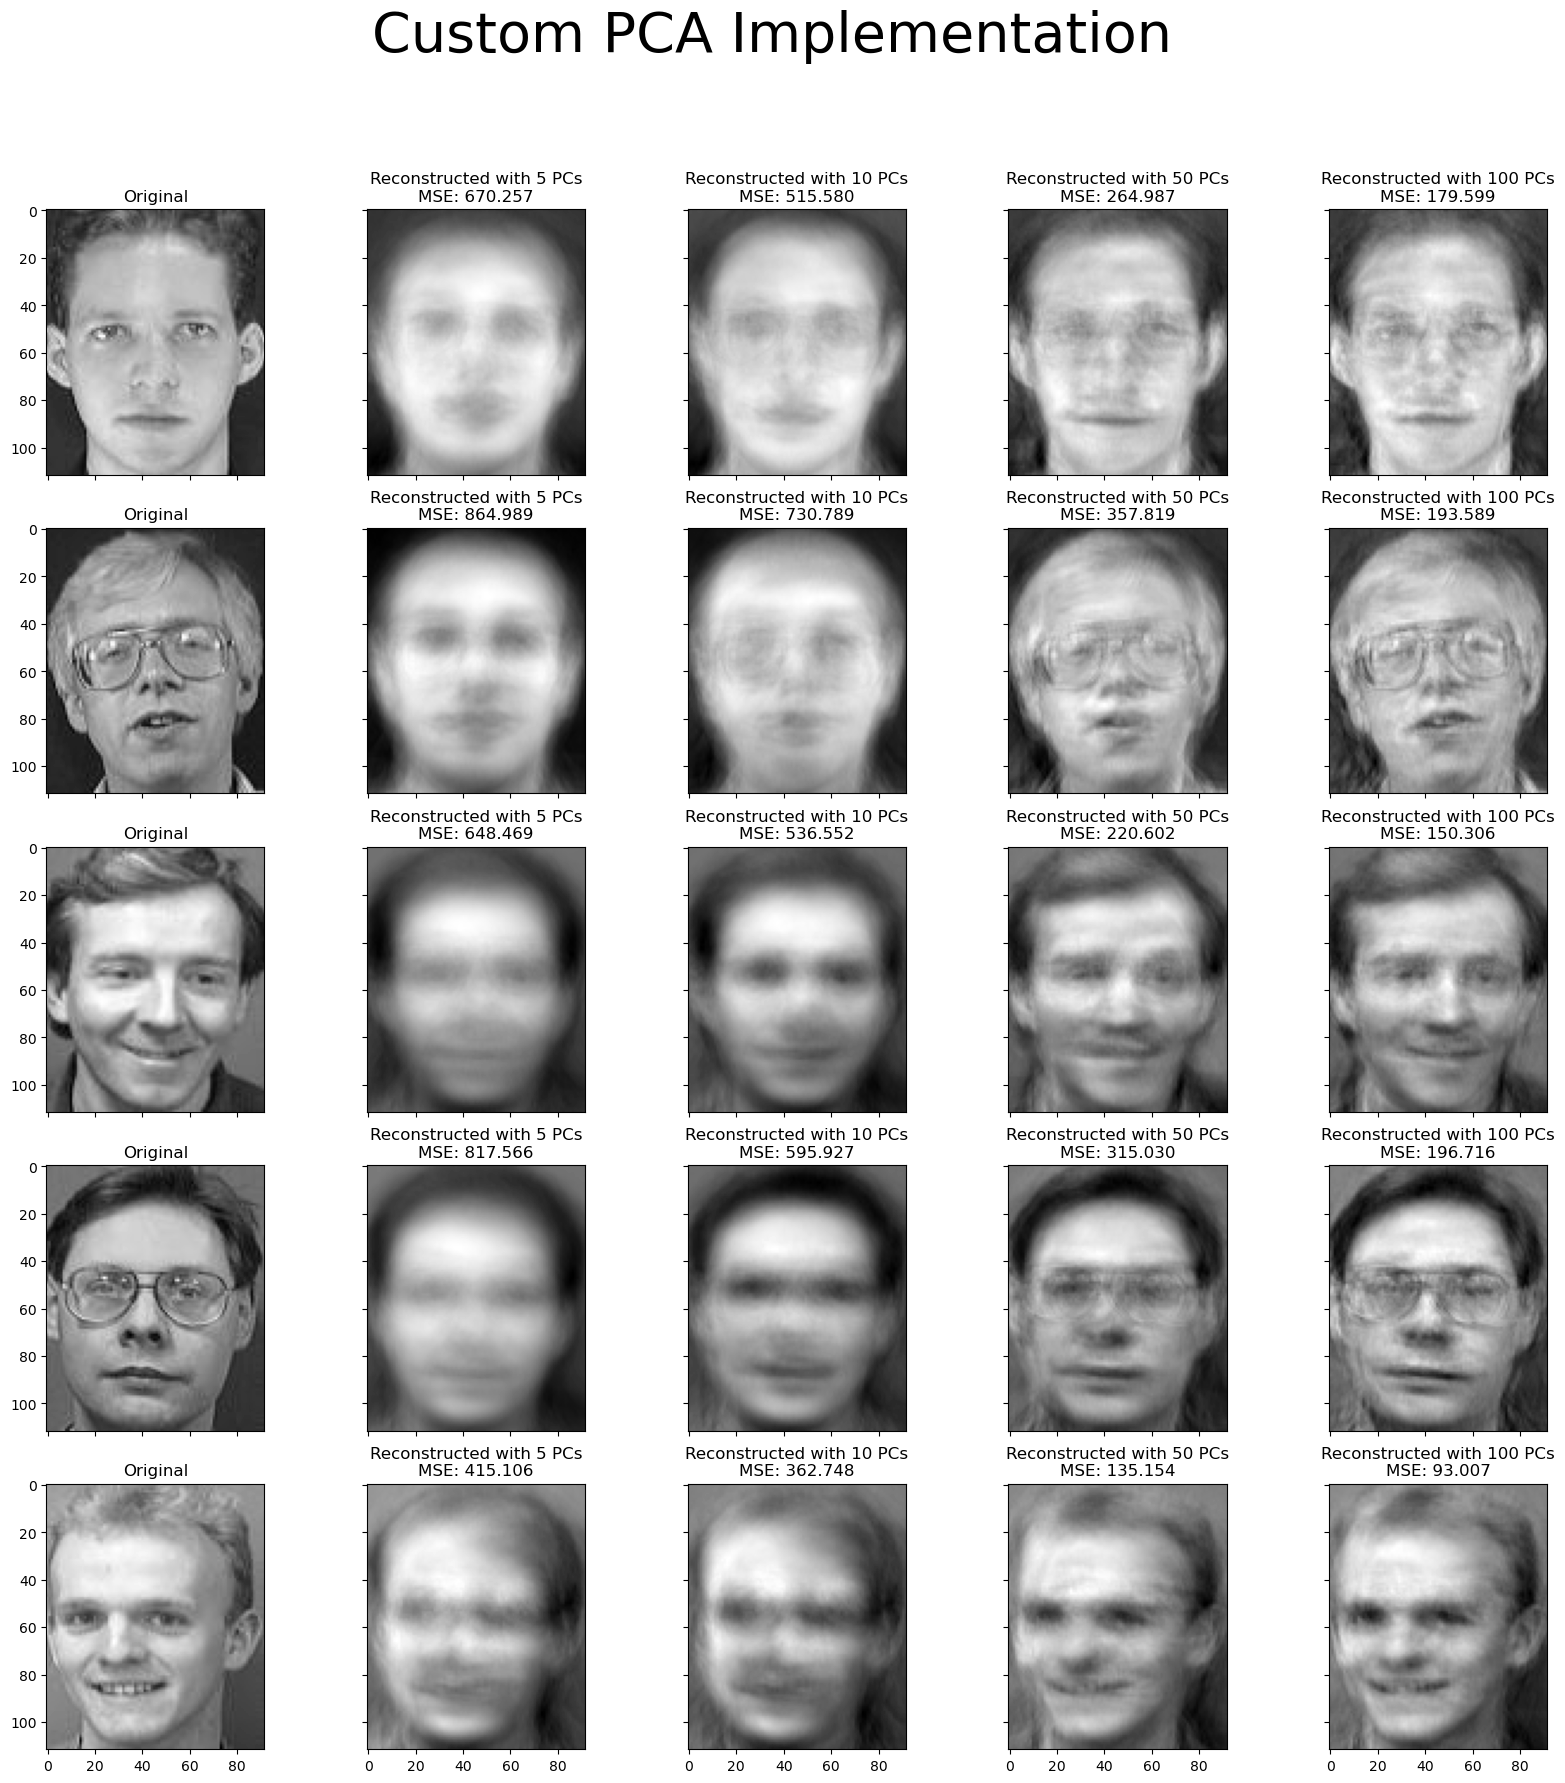

In [0]:
idx_title = {
    0: "Original",
    1: "Reconstructed with 5 PCs",
    2: "Reconstructed with 10 PCs",
    3: "Reconstructed with 50 PCs",
    4: "Reconstructed with 100 PCs",
}

faces = 5

fig, ax = plt.subplots(faces, 5, sharex=True, sharey=True, figsize=(20, 20))
fig.suptitle("Custom PCA Implementation", fontsize=40)
for i in range(faces):
    for j in range(5):
        # For displaying different faces multiplying i by 10
        face = X_reconst[j-1][i * 10] if j != 0 else X_face[i * 10]
        
        # Calculate reconstruction error
        if j != 0:
            mse = mean_squared_error(X_face[i * 10], face)
            title = f"{idx_title[j]}\nMSE: {mse:.3f}"
        else:
            title = idx_title[j]

        # Plot face and its reconstructed versions
        ax[i, j].imshow(face.reshape(width, height).T, cmap="gray")
        ax[i, j].set_title(title)

## Checking with `sklearn's` PCA implementation

In [0]:
X_sk_redu = []
X_sk_reconst = []

for n in [5, 10, 50, 100]:
    sk_pca = PCA(n_components=n)
    X_sk_red = sk_pca.fit_transform(X_face)
    X_sk_recons = sk_pca.inverse_transform(X_sk_red)

    print(f"For {n} principal components:")
    print(f"Reduced representation - {X_sk_red.shape}")
    print(f"Reconstructed - {X_sk_recons.shape}\n")

    X_sk_redu.append(X_sk_red)
    X_sk_reconst.append(X_sk_recons)

For 5 principal components:
Reduced representation - (400, 5)
Reconstructed - (400, 10304)

For 10 principal components:
Reduced representation - (400, 10)
Reconstructed - (400, 10304)

For 50 principal components:
Reduced representation - (400, 50)
Reconstructed - (400, 10304)

For 100 principal components:
Reduced representation - (400, 100)
Reconstructed - (400, 10304)



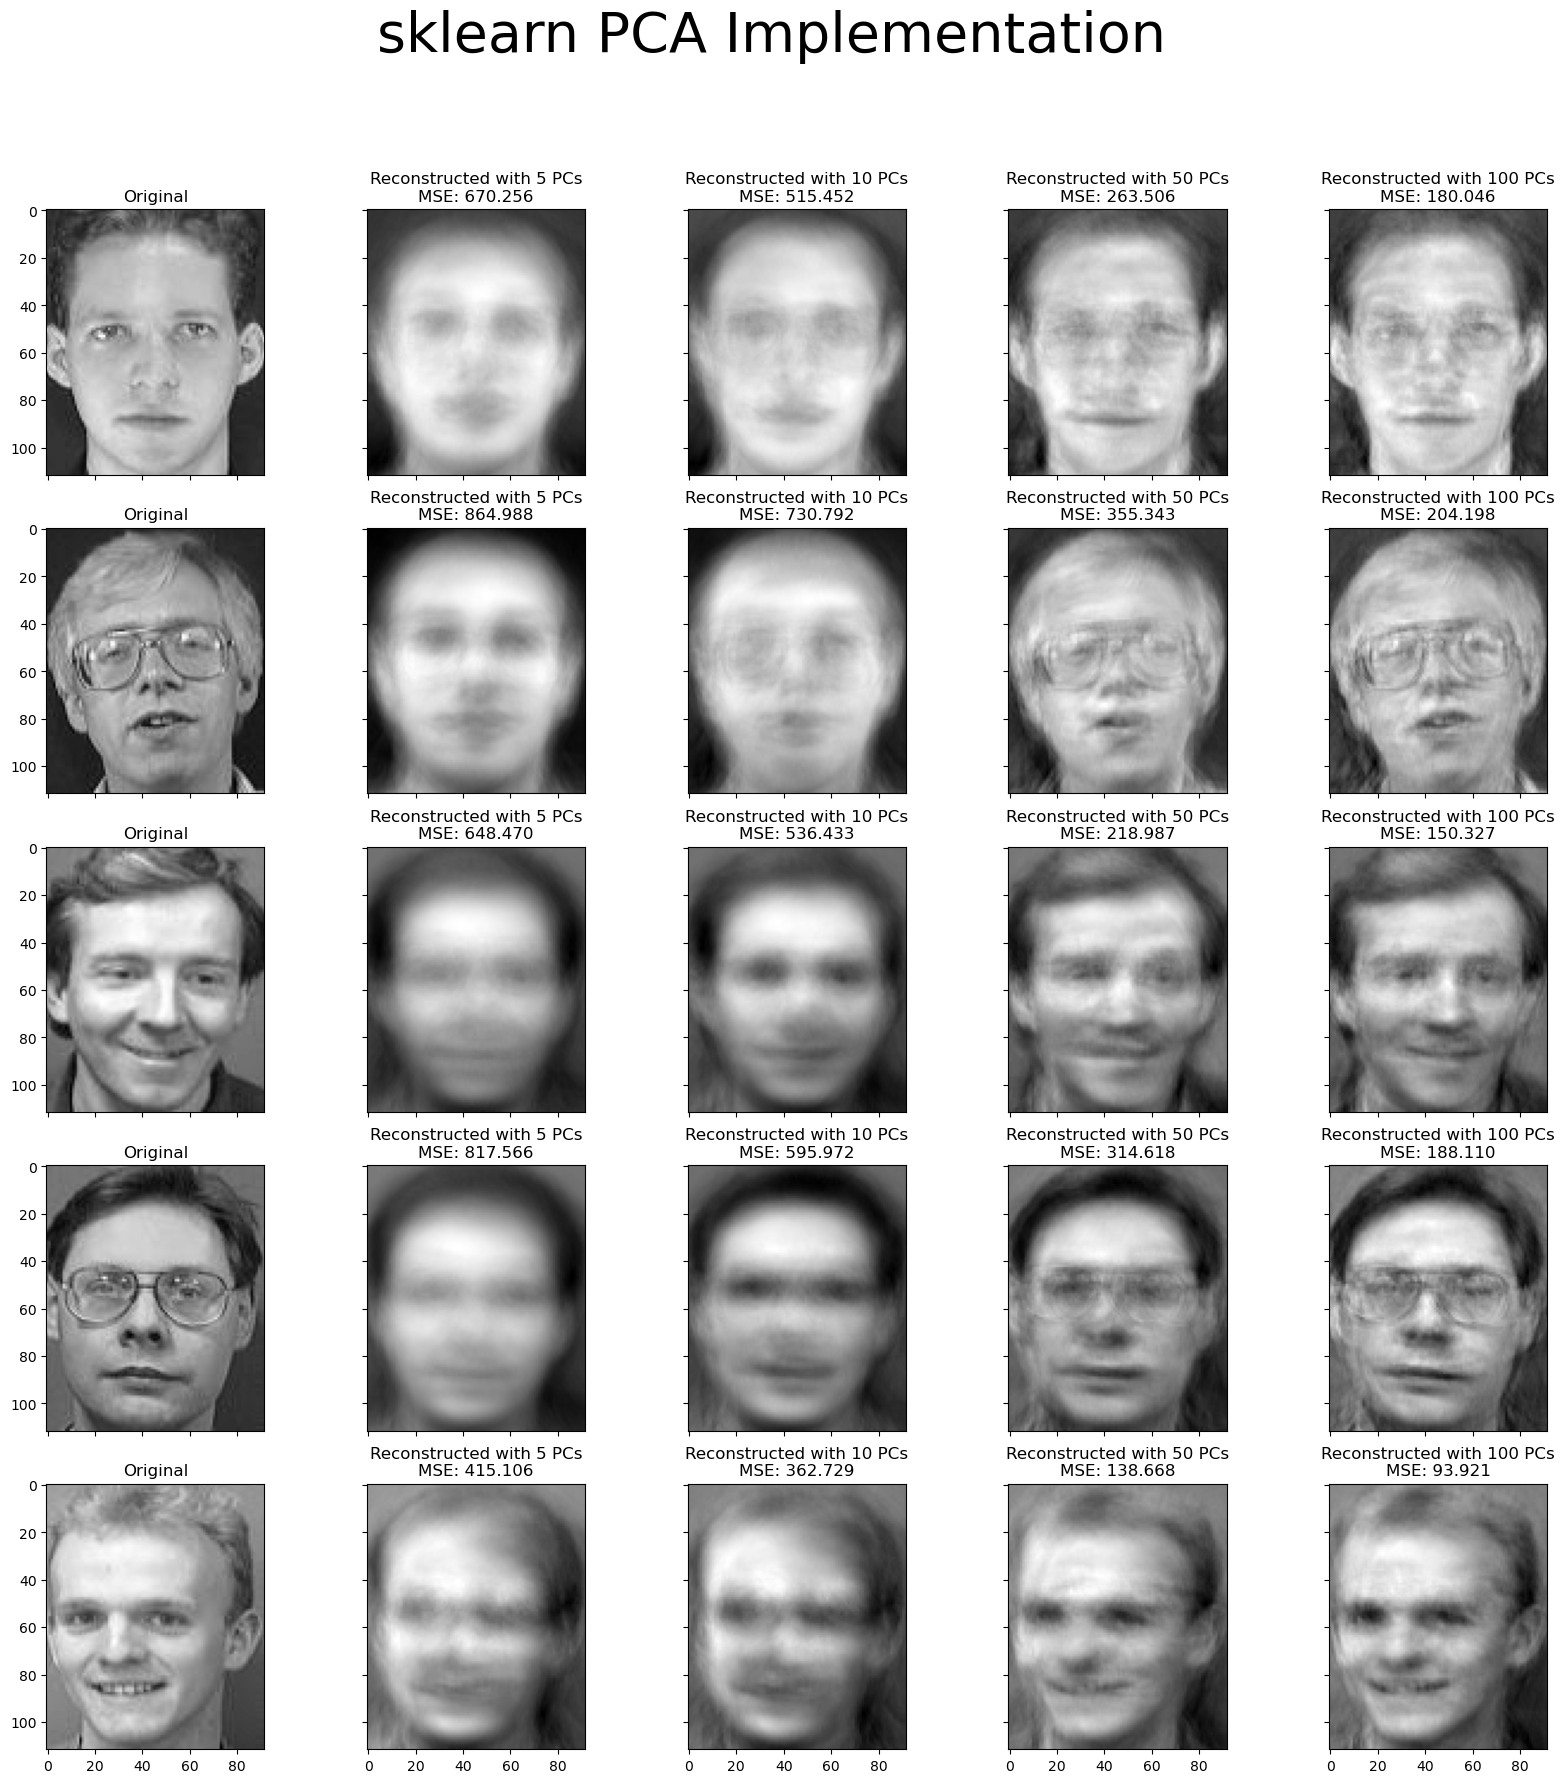

In [0]:
sk_faces = 5

fig, ax = plt.subplots(sk_faces, 5, sharex=True, sharey=True, figsize=(20, 20))
fig.suptitle("sklearn PCA Implementation", fontsize=40)
for i in range(sk_faces):
    for j in range(5):
        # For displaying different faces multiplying i by 10
        face = X_sk_reconst[j-1][i * 10] if j != 0 else X_face[i * 10]
        
        # Calculate reconstruction error
        if j != 0:
            mse = mean_squared_error(X_face[i * 10], face)
            title = f"{idx_title[j]}\nMSE: {mse:.3f}"
        else:
            title = idx_title[j]

        # Plot face and its reconstructed versions
        ax[i, j].imshow(face.reshape(width, height).T, cmap="gray")
        ax[i, j].set_title(title)

### Plotting energy curve for PCA for the faces data

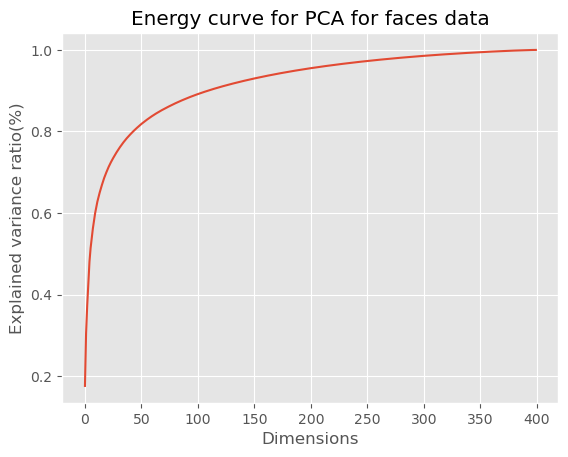

In [0]:
cumsum = np.cumsum(custom_pca.all_explained_variance_ratio)
plt.style.use('ggplot')
plt.plot(cumsum[:401])
plt.xlabel("Dimensions")
plt.ylabel("Explained variance ratio(%)")
plt.title("Energy curve for PCA for faces data")